**分析レポート**　西村祐亮　1254820305

 **幸福度と健康(平均寿命)の関係性**

 - 幸福度ランキングでは健康が重要な要因とされている
 - 直感的な仮説をデータで検証したかった

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

# 基本統計量を表示
df.describe()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


 **分析　幸福度と健康の相関分析**

 **目的**

幸福度スコアと健康指標の間に相関があるかを数量的に確認する。

In [45]:
import numpy as np

data_corr = df[['Happiness Score', 'Health (Life Expectancy)']].dropna()

corr = data_corr.corr().iloc[0, 1]
corr


np.float64(0.7344913751413352)

相関係数が約0.73となりかなり強い正の相関がある

**分析②　年ごとの相関の変化**

**目的**

幸福度と健康の関係が年によって変化しているかを見る。

In [46]:
yearly_corr = (
    df[['year', 'Happiness Score', 'Health (Life Expectancy)']]
    .dropna()
    .groupby('year')
    .corr()
    .iloc[0::2, -1]
    .reset_index()
)

yearly_corr.columns = ['year', 'metric', 'correlation']
yearly_corr[['year', 'correlation']]


,year,correlation
0,2015,0.724200
1,2016,0.765384


どちらも相関係数が0.72以上とかなり強い正の相関がある

**分析③　地域別の平均幸福度と健康**

**目的**

地域による傾向の違いを確認する。

In [47]:
region_mean = (
    df.groupby('Region')[['Happiness Score', 'Health (Life Expectancy)']]
    .mean()
    .dropna()
)

region_mean


,Happiness Score,Health (Life Expectancy)
Region,,
Australia and New Zealand,7.304250,0.880522
Central and Eastern Europe,5.351810,0.675183
Eastern Asia,5.625167,0.842034
Latin America and Caribbean,6.122283,0.656305
Middle East and Northern Africa,5.396744,0.662170
North America,7.263500,0.843505
Southeastern Asia,5.328167,0.619363
Southern Asia,4.572071,0.497250
Sub-Saharan Africa,4.170462,0.261646


地域平均で見ても、健康水準が高い地域ほど幸福度が高い傾向にあることが確認できる。

**可視化**

①　幸福度と健康

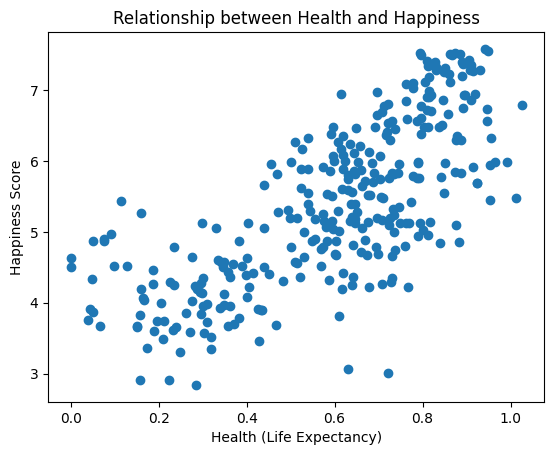

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    data_corr['Health (Life Expectancy)'],
    data_corr['Happiness Score']
)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.title('Relationship between Health and Happiness')
plt.show()


- 正の相関が確認できる
- 同じHealth値でもHappinessがばらついている

②　年ごとの相関係数(折れ線グラフ)

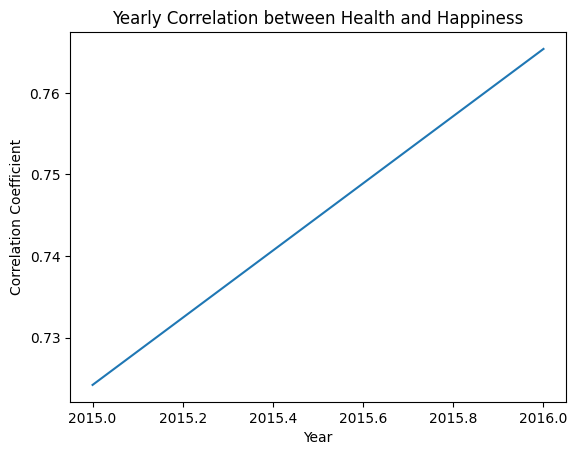

In [49]:
plt.figure()
plt.plot(
    yearly_corr['year'],
    yearly_corr['correlation']
)
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Yearly Correlation between Health and Happiness')
plt.show()


- 両年とも強い正の相関を保っている

③　地域別平均(棒グラフ)

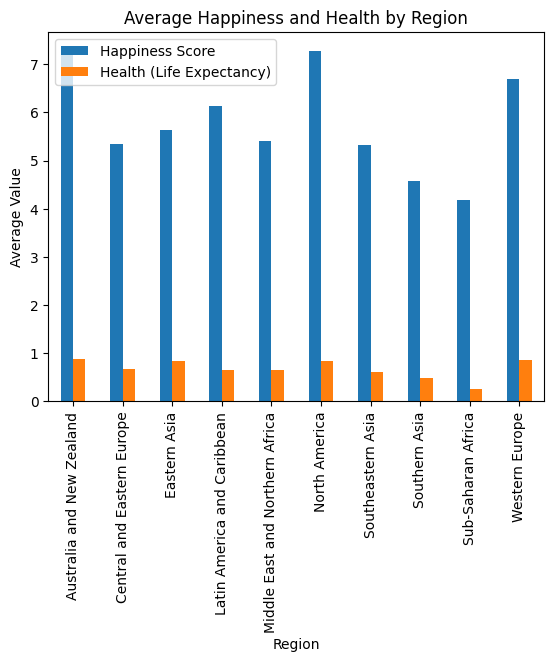

In [50]:
region_mean.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.title('Average Happiness and Health by Region')
plt.legend()
plt.show()


- Australia and New Zealand
,North America
,Western Europe
など医療水準・生活水準の高いところは幸福度も高い傾向にあり、医療水準・生活水準の高さが幸福度を支えていると言える

- Eastern Asia
は健康は高いが幸福度が相対的に低い

- Sub-Saharan Africa
,Southern Asia
は両方低い



**健康と幸福度の関係性に関する考察**

本分析により、健康水準と幸福度の関係について2つの重要な知見が得られた。

 - 健康水準が低い国においては高い幸福度がほとんど観測されないという事実が明らかになった。このことは、健康が幸福度の下限を規定する基礎的要因として機能していることを示唆している。すなわち、十分な健康水準が確保されていない状況では、高い幸福度を達成することが困難であると言える。

  - 健康水準が高い国々の間でも幸福度には顕著なばらつきが存在することが確認された。同程度の健康水準を有する国家間であっても、幸福度には大きな差異が生じており、健康のみでは幸福度の高低を十分に説明できないことが示された。

以上の結果から、健康は幸福度を実現するための必要条件としての性質を持つ一方で、それ単独では幸福度の上限を決定する要因とはなり得ないことが結論づけられる。したがって、高い幸福度を達成するためには、健康を基盤としつつ、経済的豊かさ、社会制度、人間関係などの複合的な要因を総合的に向上させることが重要であると考えられる。